In [2]:
import numpy as np
import pandas as pd

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
dfo = pd.read_csv('C:\\Users\\USER\\Desktop\\OLUWATOMMY\\work\\housing.csv')

In [4]:
dfo.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
dfo.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
dfo['total_bedrooms']=dfo.total_bedrooms.fillna(0)

In [18]:
dfo['rooms_per_household'] = dfo['total_rooms']/dfo['households']
dfo['bedrooms_per_room'] = dfo['total_bedrooms']/dfo['total_rooms']
dfo['population_per_household'] = dfo['population']/dfo['households']
dfo.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260


In [19]:
dfo['ocean_proximity'].mode()

0    <1H OCEAN
dtype: object

In [22]:
dfo_numerical = dfo.copy
dfo_numerical = dfo.drop(['median_house_value', 'ocean_proximity'], axis=1)
dfo_numerical.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,532.476211,1425.476744,499.539680,3.870671,5.429000,0.210902,3.070655
std,2.003532,2.135952,12.585558,2181.615252,422.678333,1132.462122,382.329753,1.899822,2.474173,0.061473,10.386050
min,-124.350000,32.540000,1.000000,2.000000,0.000000,3.000000,1.000000,0.499900,0.846154,0.000000,0.692308
25%,-121.800000,33.930000,18.000000,1447.750000,292.000000,787.000000,280.000000,2.563400,4.440716,0.174539,2.429741
50%,-118.490000,34.260000,29.000000,2127.000000,431.000000,1166.000000,409.000000,3.534800,5.229129,0.202626,2.818116
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,6.052381,0.239273,3.282261
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,141.909091,1.000000,1243.333333


In [24]:
dfo_numerical.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.924664,-0.108197,0.044568,0.068082,0.099773,0.055310,-0.015176,-0.027540,0.084836,0.002476
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.065318,-0.108785,-0.071035,-0.079809,0.106389,-0.104112,0.002366
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.317063,-0.296244,-0.302916,-0.119034,-0.153277,0.125396,0.013191
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.920196,0.857126,0.918484,0.198050,0.133798,-0.174583,-0.024581
total_bedrooms,0.068082,-0.065318,-0.317063,0.920196,1.000000,0.866266,0.966507,-0.007295,0.002717,0.122205,-0.028019
population,0.099773,-0.108785,-0.296244,0.857126,0.866266,1.000000,0.907222,0.004834,-0.072213,0.031397,0.069863
households,0.055310,-0.071035,-0.302916,0.918484,0.966507,0.907222,1.000000,0.013033,-0.080598,0.059818,-0.027309
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007295,0.004834,0.013033,1.000000,0.326895,-0.573836,0.018766
rooms_per_household,-0.027540,0.106389,-0.153277,0.133798,0.002717,-0.072213,-0.080598,0.326895,1.000000,-0.387465,-0.004852
bedrooms_per_room,0.084836,-0.104112,0.125396,-0.174583,0.122205,0.031397,0.059818,-0.573836,-0.387465,1.000000,0.003047


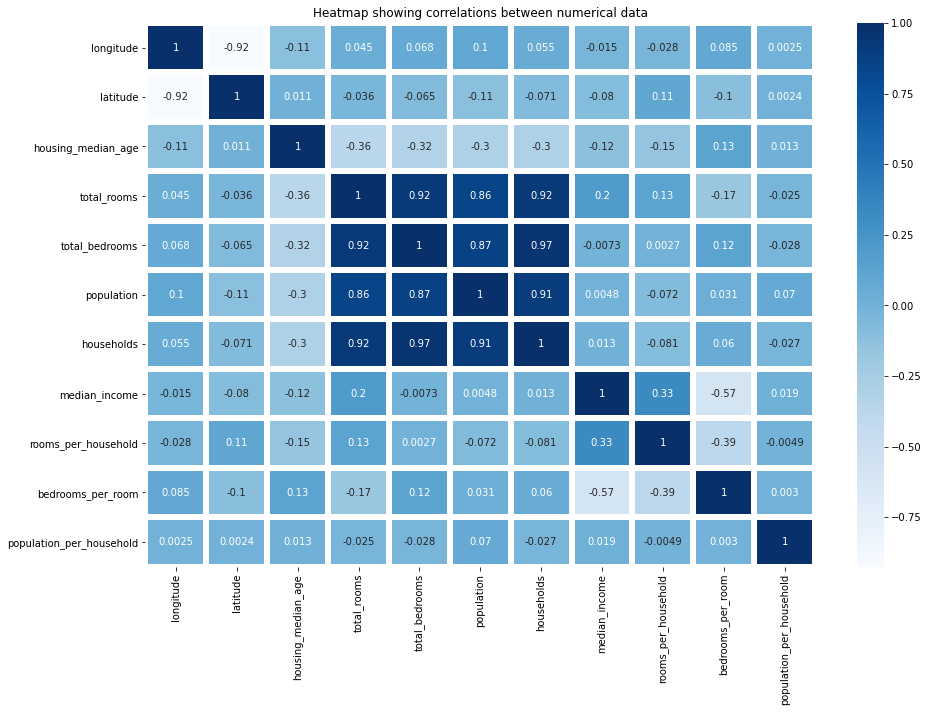

In [32]:
plt.figure(figsize=(15,10))
sns.heatmap(dfo_numerical.corr(),annot=True, linewidth=5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

In [37]:
dfo_numerical.corr().unstack().sort_values(ascending = False)

longitude            longitude              1.000000
latitude             latitude               1.000000
bedrooms_per_room    bedrooms_per_room      1.000000
rooms_per_household  rooms_per_household    1.000000
median_income        median_income          1.000000
                                              ...   
rooms_per_household  bedrooms_per_room     -0.387465
bedrooms_per_room    median_income         -0.573836
median_income        bedrooms_per_room     -0.573836
longitude            latitude              -0.924664
latitude             longitude             -0.924664
Length: 121, dtype: float64

In [ ]:
#The features with the biggest correlation
#in this datset are total_bedrooms and households

In [42]:
dfo_class = dfo.copy
dfo_class('median_house_value').mean()
#mean for our median_house_value is 206855.816909

longitude                     -119.569704
latitude                        35.631861
housing_median_age              28.639486
total_rooms                   2635.763081
total_bedrooms                 532.476211
population                    1425.476744
households                     499.539680
median_income                    3.870671
median_house_value          206855.816909
rooms_per_household              5.429000
bedrooms_per_room                0.210902
population_per_household         3.070655
dtype: float64

In [52]:
dfo_class = dfo.copy()
mean = dfo_class['median_house_value'].mean()

dfo_class['above_average'] = np.where(dfo_class['median_house_value']>=mean,1,0)
dfo_class['above_average']

0        1
1        1
2        1
3        1
4        1
        ..
20635    0
20636    0
20637    0
20638    0
20639    0
Name: above_average, Length: 20640, dtype: int32

In [ ]:
dfo_class = dfo_class.drop('median_house_value', axis=1)

In [47]:
#Split your data in train/val/test sets, with 60%/20%/20% distribution.
from sklearn.model_selection import train_test_split

In [48]:
# Divide the dataset into two; train and test 
df_full_train, df_test = train_test_split(dfo_class, test_size=0.2, random_state=42)

In [49]:
len(df_full_train), len(df_test)

(16512, 4128)

In [50]:
#Split the train data into two; train and validation
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [53]:
len(df_train), len(df_test), len(df_val)

(12384, 4128, 4128)

In [ ]:
#To reset the index of the 3 splitted data: Not compulsory just for data organisation
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [54]:
y_train =df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

In [59]:
#Mutual information
from sklearn.metrics import mutual_info_score

In [60]:
categorical = ['ocean_proximity']

In [62]:
def calculate_mi(series):
    return mutual_info_score(series, df_train.above_average)

df_mi =df_train[categorical].apply(calculate_mi)
df_mi =df_mi.sort_values(ascending=False).to_frame(name= 'mutual_information')
df_mi

,mutual_information
ocean_proximity,0.101384


In [63]:
df_mi.round(2)

,mutual_information
ocean_proximity,0.1


In [57]:
df_train = df_train.drop('above_average', axis=1
df_val = df_val.drop('above_average', axis=1
df_test = df_test.drop('above_average', axis=1)

longitude                   float64
latitude                    float64
housing_median_age          float64
total_rooms                 float64
total_bedrooms              float64
population                  float64
households                  float64
median_income               float64
median_house_value          float64
ocean_proximity              object
rooms_per_household         float64
bedrooms_per_room           float64
population_per_household    float64
dtype: object

In [66]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [77]:
numerical = ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household' ]

In [71]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')


In [72]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

In [73]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')

In [74]:
#We don't fit on validation dataset, we've already fitted on train, so we would just transform
x_val = dv.transform(val_dicts)

In [75]:
model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
model.fit(X_train, y_train)

#hard predictions
model.predict(x_val)
y_pred = model.predict(x_val)

accuracy = np.round(accuracy_score(y_val, y_pred),2)
print(accuracy)

0.98


In [ ]:
#Accuracy of 0.98 which is close to the 0.95 amoung the options

In [78]:
#Concatenation
features = categorical + numerical
features

['ocean_proximity',
 'latitude',
 'longitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_household',
 'bedrooms_per_room',
 'population_per_household']

In [81]:
orig_acc = accuracy


for c in features:
    subset = features.copy()
    subset.remove(c)
    
    train_dict = df_train[subset].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)

    x_train = dv.transform(train_dict)

    model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
    model.fit(x_train, y_train)

    val_dict = df_val[subset].to_dict(orient='records')
    x_val = dv.transform(val_dict)

    y_pred = model.predict(x_val)

    new_score = accuracy_score(y_val, y_pred)
    print(c, orig_acc - new_score)

ocean_proximity 0.18106589147286822
latitude 0.15756782945736436
longitude 0.1604748062015504
housing_median_age 0.1822771317829457
total_rooms 0.15611434108527134
total_bedrooms 0.15514534883720932
population 0.1604748062015504
households 0.15030038759689923
median_income 0.22636627906976747
rooms_per_household 0.17307170542635653
bedrooms_per_room 0.1769476744186046
population_per_household 0.16095930232558142


In [ ]:
#feature with the smallest difference is households with 0.15030038759689923

In [83]:
dfo['median_house_value']=np.log1p(dfo['median_house_value'])

In [97]:
df_train_full, df_test = train_test_split(dfo, test_size=0.2, random_state=1)

In [98]:
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)

In [99]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [100]:
y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

In [101]:
df_train = df_train.drop('median_house_value', axis=1)
df_val = df_val.drop('median_house_value', axis=1)
df_test = df_test.drop('median_house_value', axis=1)

In [102]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')

In [103]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

x_train = dv.transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
x_val = dv.transform(val_dict)

In [104]:
#Ridge regression
from sklearn.linear_model import Ridge
#For RMSE
from sklearn.metrics import mean_squared_error

In [105]:
for a in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=a, random_state=42, solver='sag')
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_val)
    
    score = np.sqrt(mean_squared_error(y_val, y_pred))
    
    print(a, round(score, 3))

0 0.041
0.01 0.041
0.1 0.041
1 0.041
10 0.041
